In [55]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import sklearn.model_selection
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [56]:
dataset_path = 'Admission_Predict_Ver1.1.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
dataset = raw_dataset.copy() # Borrar el raw copy, es para poder hacer prints sobre esto y no tener datos distintos

# Split into vectors the dataset. y_all being the chance, x_all the other cols
# Y also gets categorized in 5 classes as output asks for.
bins = pd.cut(dataset.pop("Chance of Admit "), bins=np.array([0, 0.5, 0.65, 0.8, 0.9, 1]), labels=[0,1,2,3,4])
y_all = keras.utils.to_categorical(bins, num_classes=5)
x_all = dataset

# Split dataset into train and tests. 33% used as asked.
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x_all, y_all, test_size=0.33, random_state=0)

In [66]:
y_all

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [84]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=tuple([x_train.shape[1]])),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(5, activation=tf.nn.sigmoid)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mean_absolute_error', 'mean_squared_error', 'categorical_accuracy'])
  return model

In [85]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 325       
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=200, validation_data=(x_valid, y_valid), verbose=1)

Train on 335 samples, validate on 165 samples
Epoch 1/200
335/335 [==============================] - 0s 942us/sample - loss: 0.5499 - mean_absolute_error: 0.5566 - mean_squared_error: 0.5499 - categorical_accuracy: 0.0746 - val_loss: 0.4894 - val_mean_absolute_error: 0.4919 - val_mean_squared_error: 0.4894 - val_categorical_accuracy: 0.1212
Epoch 2/200
335/335 [==============================] - 0s 18us/sample - loss: 0.4836 - mean_absolute_error: 0.4863 - mean_squared_error: 0.4836 - categorical_accuracy: 0.0776 - val_loss: 0.4310 - val_mean_absolute_error: 0.4379 - val_mean_squared_error: 0.4310 - val_categorical_accuracy: 0.1455
Epoch 3/200
335/335 [==============================] - 0s 17us/sample - loss: 0.4312 - mean_absolute_error: 0.4371 - mean_squared_error: 0.4312 - categorical_accuracy: 0.1015 - val_loss: 0.3772 - val_mean_absolute_error: 0.3794 - val_mean_squared_error: 0.3772 - val_categorical_accuracy: 0.2303
Epoch 4/200
335/335 [==============================] - 0s 28us/sa

Epoch 29/200
335/335 [==============================] - 0s 36us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 30/200
335/335 [==============================] - 0s 32us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 31/200
335/335 [==============================] - 0s 26us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 32/200
335/335 [==============================] - 0s 22us/sample - loss: 0.2412 - mean_absolute_error: 

Epoch 57/200
335/335 [==============================] - 0s 17us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 58/200
335/335 [==============================] - 0s 33us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 59/200
335/335 [==============================] - 0s 20us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 60/200
335/335 [==============================] - 0s 31us/sample - loss: 0.2412 - mean_absolute_error: 

Epoch 85/200
335/335 [==============================] - 0s 15us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 86/200
335/335 [==============================] - 0s 25us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 87/200
335/335 [==============================] - 0s 16us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 88/200
335/335 [==============================] - 0s 26us/sample - loss: 0.2412 - mean_absolute_error: 

Epoch 113/200
335/335 [==============================] - 0s 24us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 114/200
335/335 [==============================] - 0s 20us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 115/200
335/335 [==============================] - 0s 30us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 116/200
335/335 [==============================] - 0s 28us/sample - loss: 0.2412 - mean_absolute_err

Epoch 141/200
335/335 [==============================] - 0s 20us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 142/200
335/335 [==============================] - 0s 25us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 143/200
335/335 [==============================] - 0s 21us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 144/200
335/335 [==============================] - 0s 29us/sample - loss: 0.2412 - mean_absolute_err

Epoch 169/200
335/335 [==============================] - 0s 25us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 170/200
335/335 [==============================] - 0s 17us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 171/200
335/335 [==============================] - 0s 23us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 172/200
335/335 [==============================] - 0s 28us/sample - loss: 0.2412 - mean_absolute_err

Epoch 197/200
335/335 [==============================] - 0s 23us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 198/200
335/335 [==============================] - 0s 28us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 199/200
335/335 [==============================] - 0s 18us/sample - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_squared_error: 0.2412 - categorical_accuracy: 0.3970 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 200/200
335/335 [==============================] - 0s 34us/sample - loss: 0.2412 - mean_absolute_err

In [98]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'categorical_accuracy', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_categorical_accuracy'])

In [87]:
# This is useless, it's just for getting the data in the last epoch (200) and see its error
# We can also see this values in the epoch 200 while it was training
x_test = dataset
y_test = model.predict(x_test)

y_test

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 5.6413129e-17, 1.0000000e+00, 4.4407186e-11,
        4.9308957e-10]], dtype=float32)

In [88]:
# Mean squared error
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_all, y_test)
cm

0.24000001

In [104]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.argmax(y_all, axis=1), np.argmax(y_test, axis=1))
accuracy * 100

40.0

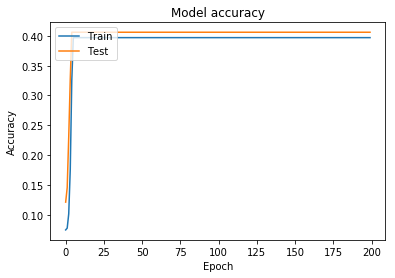

In [99]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

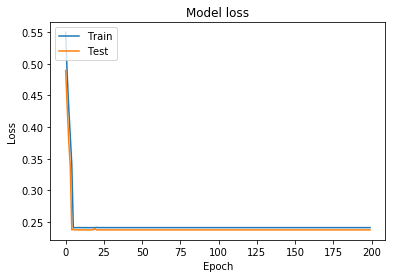

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()